# Applied Data Science Capstone
## Car Accident Severity
### Made by: Yevgeniy Dobrynin
### Rev: 1.0
### Date: 13-Oct-20

### Introduction

###### Statistically the most dangerous transport is car. Approximately 1.35 million people die each year as a result of road traffic crashes. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury. Seattle city has an intensive traffic and as the result frequent collision accidents with fatalities and heavy injuries. From 2004 to 2020 it was recorded 78,596 injuries and 328 fatalities as the result of road accidents in Seattle city. Analysis of such data could reveal dangerous areas and other factors leading to high probability of accidents to occur.
###### Stakeholders who may benefit from the analysis are: drivers, insurance companies, hospitals and police.


### 1. Load and reviw data

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import os
from sklearn.preprocessing import OrdinalEncoder
## Load the project dataset
df_CAS = pd.read_csv('C:\Dell\Collisions.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [2]:
# Get info for df
df_CAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [3]:
#Display all values for 10 rows
pd.set_option('display.max_columns', None)
df_CAS.head(10)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Raining,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,,NaN,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,,NaN,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,NaN,NaN,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Clear,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N
5,-122.333067,47.544302,6,322205,323705,3694789,Matched,Block,NaN,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
6,-122.338543,47.616874,7,322275,323775,E949282,Matched,Block,NaN,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,,NaN,1,Property Damage Only Collision,Cycles,3,0,1,1,0,0,0,2019/08/08 00:00:00+00,8/8/2019 8:57:00 AM,Mid-Block (not related to intersection),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",Y,N,Overcast,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
7,NaN,NaN,8,5721,5721,1786583,Unmatched,NaN,NaN,NaN,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Parked Car,0,0,0,2,0,0,0,2007/08/27 00:00:00+00,8/27/2007,Mid-Block (not related to intersection),13.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Daylight,NaN,3239035.0,NaN,32,One parked--one moving,0,0,N
8,-122.360959,47.571594,9,33400,33400,1076890,Matched,Block,NaN,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,NaN,NaN,2b,Serious Injury Collision,Rear Ended,3,0,0,3,3,1,0,2005/07/06 00:00:00+00,7/6/2005,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Clear,Dry,Daylight,NaN,5187041.0,NaN,13,From same direction - both going straight - bo...,0,0,N
9,-122.336856,47.655652,10,20400,20400,1220377,Matched,Block,NaN,N 40TH ST BETWEEN DENSMO

In [4]:
#Check number of unique values
df_CAS.nunique()

X                   24983
Y                   24983
OBJECTID           221738
INCKEY             221738
COLDETKEY          221738
REPORTNO           221735
STATUS                  2
ADDRTYPE                3
INTKEY               7917
LOCATION            25209
EXCEPTRSNCODE           2
EXCEPTRSNDESC           1
SEVERITYCODE            5
SEVERITYDESC            5
COLLISIONTYPE          10
PERSONCOUNT            48
PEDCOUNT                7
PEDCYLCOUNT             3
VEHCOUNT               16
INJURIES               16
SERIOUSINJURIES         7
FATALITIES              6
INCDATE              6109
INCDTTM            169669
JUNCTIONTYPE            7
SDOT_COLCODE           40
SDOT_COLDESC           40
INATTENTIONIND          1
UNDERINFL               4
WEATHER                12
ROADCOND                9
LIGHTCOND               9
PEDROWNOTGRNT           1
SDOTCOLNUM         127186
SPEEDING                1
ST_COLCODE             63
ST_COLDESC             62
SEGLANEKEY           2118
CROSSWALKKEY

###### The information was provided by Seattle Police Department from 2004 to 2020 containing 221,737 records. Database was obtained from the following link:
https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions 
Dataset contains 39 columns of accident records.


In [5]:
#Check where are NaNs in the dataframe
print(df_CAS.isnull().sum(axis=0))

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

### 2. Data Cleaning and Preparation

###### Dataset in their original form is not suitable for analysis, thus the following preprocess were applied:
1.	Drop columns that is not going to be used in analysis. 26 columns were dropped in total including unnecessary and redundant columns.
2.	Data incompleteness. Around 15% of the data were missing one or more key features required for analysis. As the result of data cleaning and preprocessing such data were dropped from the dataset including NaN and Unknown values.
3.	Convert categorical data to numerical. In order to apply Machine Learning models it requires to convert all categorical data to numeric. As an example, “ROADCOND” column contains strings that can’t be directly processed by Machine Learning Engines. Picture below demonstrates conversion from categorical to numerical string.
4.	The same transformation were also applied to “SEVERITYCODE”, “WEATHER”, “LIGHTCOND” and “SPEEDING”


#### 2.1 Remove data columns that will not be used for analysis

In [6]:
if 'OBJECTID' in df_CAS:
    del df_CAS["OBJECTID"]
if 'INCKEY' in df_CAS:
    del df_CAS["INCKEY"]
if 'COLDETKEY' in df_CAS:
    del df_CAS["COLDETKEY"]
if 'REPORTNO' in df_CAS:
    del df_CAS["REPORTNO"]
if 'STATUS' in df_CAS:
    del df_CAS["STATUS"]
if 'ADDRTYPE' in df_CAS:
    del df_CAS["ADDRTYPE"]
if 'INTKEY' in df_CAS:
    del df_CAS["INTKEY"]    
if 'LOCATION' in df_CAS:
    del df_CAS["LOCATION"]
if 'EXCEPTRSNCODE' in df_CAS:
    del df_CAS["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in df_CAS:
    del df_CAS["EXCEPTRSNDESC"]
if 'COLLISIONTYPE' in df_CAS:
    del df_CAS["COLLISIONTYPE"]
if 'VEHCOUNT' in df_CAS:
    del df_CAS["VEHCOUNT"]
if 'INCDATE' in df_CAS:
    del df_CAS["INCDATE"]
if 'INCDTTM' in df_CAS:
    del df_CAS["INCDTTM"]
if 'JUNCTIONTYPE' in df_CAS:
    del df_CAS["JUNCTIONTYPE"]
if 'SDOT_COLCODE' in df_CAS:
    del df_CAS["SDOT_COLCODE"]
if 'SDOT_COLDESC' in df_CAS:
    del df_CAS["SDOT_COLDESC"]
if 'INATTENTIONIND' in df_CAS:
    del df_CAS["INATTENTIONIND"]
if 'UNDERINFL' in df_CAS:
    del df_CAS["UNDERINFL"]
if 'PEDROWNOTGRNT' in df_CAS:
    del df_CAS["PEDROWNOTGRNT"]
if 'SDOTCOLNUM' in df_CAS:
    del df_CAS["SDOTCOLNUM"]
if 'ST_COLCODE' in df_CAS:
    del df_CAS["ST_COLCODE"]
if 'ST_COLDESC' in df_CAS:
    del df_CAS["ST_COLDESC"]
if 'SEGLANEKEY' in df_CAS:
    del df_CAS["SEGLANEKEY"]
if 'CROSSWALKKEY' in df_CAS:
    del df_CAS["CROSSWALKKEY"]
if 'HITPARKEDCAR' in df_CAS:
    del df_CAS["HITPARKEDCAR"]
df_CAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   SEVERITYCODE     221737 non-null  object 
 3   SEVERITYDESC     221738 non-null  object 
 4   PERSONCOUNT      221738 non-null  int64  
 5   PEDCOUNT         221738 non-null  int64  
 6   PEDCYLCOUNT      221738 non-null  int64  
 7   INJURIES         221738 non-null  int64  
 8   SERIOUSINJURIES  221738 non-null  int64  
 9   FATALITIES       221738 non-null  int64  
 10  WEATHER          195097 non-null  object 
 11  ROADCOND         195178 non-null  object 
 12  LIGHTCOND        195008 non-null  object 
 13  SPEEDING         9936 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 23.7+ MB


#### 2.2 Drop missing values for SPEEDING and convert to binary

In [7]:
df_CAS["SPEEDING"].replace(np.nan, 0, inplace=True)
df_CAS["SPEEDING"].replace("Y", 1, inplace=True)
df_PLT = df_CAS['SPEEDING'].replace([1,0],['Yes','No'])
df_CAS["SPEEDING"].value_counts()

0    211802
1      9936
Name: SPEEDING, dtype: int64

#### 2.3 Check where are NaNs in the dataframe

In [8]:
print(df_CAS.isnull().sum(axis=0))

X                   7478
Y                   7478
SEVERITYCODE           1
SEVERITYDESC           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
WEATHER            26641
ROADCOND           26560
LIGHTCOND          26730
SPEEDING               0
dtype: int64


#### 2.4 Drop colunms with empty and NaN values

In [9]:
df_CAS.replace('', np.nan, inplace=True)
df_CAS.dropna(inplace=True)
print(df_CAS.isnull().sum(axis=0))

X                  0
Y                  0
SEVERITYCODE       0
SEVERITYDESC       0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
SPEEDING           0
dtype: int64


#### 2.5 Remove rows with missing information about the target variable

In [10]:
#Identify and remove rows with SEVERITYDESC = "Unknown"
todrop = df_CAS["SEVERITYDESC"] == 'Unknown'
print("\n Drop SEVERITYDESC "+str(todrop.values.sum())+" rows.")
df_CAS.drop(df_CAS.index[todrop], inplace=True)
#Drop missing WEATHER
todrop1 = df_CAS["WEATHER"] == 'Unknown'
print("\n Drop WEATHER "+str(todrop1.values.sum())+" rows.")
df_CAS.drop(df_CAS.index[todrop1], inplace=True)
#Drop missing ROADCOND
todrop2 = df_CAS["ROADCOND"] == 'Unknown'
print("\n Drop ROADCOND "+str(todrop2.values.sum())+" rows.")
df_CAS.drop(df_CAS.index[todrop2], inplace=True)
#Drop missing LIGHTCOND
todrop3 = df_CAS["LIGHTCOND"] == 'Unknown'
print("\n Drop LIGHTCOND "+str(todrop3.values.sum())+" rows.")
df_CAS.drop(df_CAS.index[todrop3], inplace=True)

print("Done!")

#Re-index dataframe to account for missing rows
df_CAS.reset_index(inplace=True)


 Drop SEVERITYDESC 2 rows.

 Drop WEATHER 13886 rows.

 Drop ROADCOND 1388 rows.

 Drop LIGHTCOND 2293 rows.
Done!


#### 2.6 Convert the Cotegorical Data to Numerical

##### Define ordinal encoding for SEVERITYCODE

In [11]:
# define ordinal encoding
encoder = OrdinalEncoder()
df_CAS['SEVERITYCODE_num'] = df_CAS['SEVERITYCODE']
df_CAS[["SEVERITYCODE_num"]] = encoder.fit_transform(df_CAS[["SEVERITYCODE"]])
df_CAS["SEVERITYCODE_num"] = df_CAS["SEVERITYCODE_num"].astype(float).astype(int)
df_CAS["SEVERITYCODE_num"].value_counts()

0    113156
1     55584
2      2945
3       328
Name: SEVERITYCODE_num, dtype: int64

##### Define ordinal encoding for WEATHER

In [12]:
df_CAS["WEATHER"].value_counts()

Clear                       110446
Raining                      32496
Overcast                     27249
Snowing                        831
Fog/Smog/Smoke                 547
Other                          253
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                   10
Name: WEATHER, dtype: int64

In [13]:
df_CAS['WEATHER_num'] = df_CAS['WEATHER']
df_CAS[["WEATHER_num"]] = encoder.fit_transform(df_CAS[["WEATHER"]])
df_CAS["WEATHER_num"] = df_CAS["WEATHER_num"].astype(float).astype(int)
df_CAS["WEATHER_num"].value_counts()

1    110446
6     32496
4     27249
9       831
2       547
3       253
8       113
0        43
7        25
5        10
Name: WEATHER_num, dtype: int64

##### Define ordinal encoding for LIGHTCOND

In [14]:
df_CAS["LIGHTCOND"].value_counts()

Daylight                    113867
Dark - Street Lights On      47289
Dusk                          5722
Dawn                          2450
Dark - No Street Lights       1382
Dark - Street Lights Off      1114
Other                          167
Dark - Unknown Lighting         22
Name: LIGHTCOND, dtype: int64

In [15]:
df_CAS['LIGHTCOND_num'] = df_CAS['LIGHTCOND']
df_CAS[["LIGHTCOND_num"]] = encoder.fit_transform(df_CAS[["LIGHTCOND"]])
df_CAS["LIGHTCOND_num"] = df_CAS["LIGHTCOND_num"].astype(float).astype(int)
df_CAS["LIGHTCOND_num"].value_counts()

5    113867
2     47289
6      5722
4      2450
0      1382
1      1114
7       167
3        22
Name: LIGHTCOND_num, dtype: int64

##### Define ordinal encoding for ROADCOND

In [16]:
df_CAS["ROADCOND"].value_counts()

Dry               123439
Wet                46329
Ice                 1093
Snow/Slush           842
Other                102
Standing Water        99
Sand/Mud/Dirt         59
Oil                   50
Name: ROADCOND, dtype: int64

In [17]:
df_CAS['ROADCOND_num'] = df_CAS['ROADCOND']
df_CAS[["ROADCOND_num"]] = encoder.fit_transform(df_CAS[["ROADCOND"]])
df_CAS["ROADCOND_num"] = df_CAS["ROADCOND_num"].astype(float).astype(int)
df_CAS["ROADCOND_num"].value_counts()

0    123439
7     46329
1      1093
5       842
3       102
6        99
4        59
2        50
Name: ROADCOND_num, dtype: int64

#### 2.7 Final dataframe

In [18]:
df_CAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172013 entries, 0 to 172012
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             172013 non-null  int64  
 1   X                 172013 non-null  float64
 2   Y                 172013 non-null  float64
 3   SEVERITYCODE      172013 non-null  object 
 4   SEVERITYDESC      172013 non-null  object 
 5   PERSONCOUNT       172013 non-null  int64  
 6   PEDCOUNT          172013 non-null  int64  
 7   PEDCYLCOUNT       172013 non-null  int64  
 8   INJURIES          172013 non-null  int64  
 9   SERIOUSINJURIES   172013 non-null  int64  
 10  FATALITIES        172013 non-null  int64  
 11  WEATHER           172013 non-null  object 
 12  ROADCOND          172013 non-null  object 
 13  LIGHTCOND         172013 non-null  object 
 14  SPEEDING          172013 non-null  int64  
 15  SEVERITYCODE_num  172013 non-null  int32  
 16  WEATHER_num       17

### 3. Data Visualization

In [19]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


#### 3.1 Visualize quantities of accidents and number of people involved

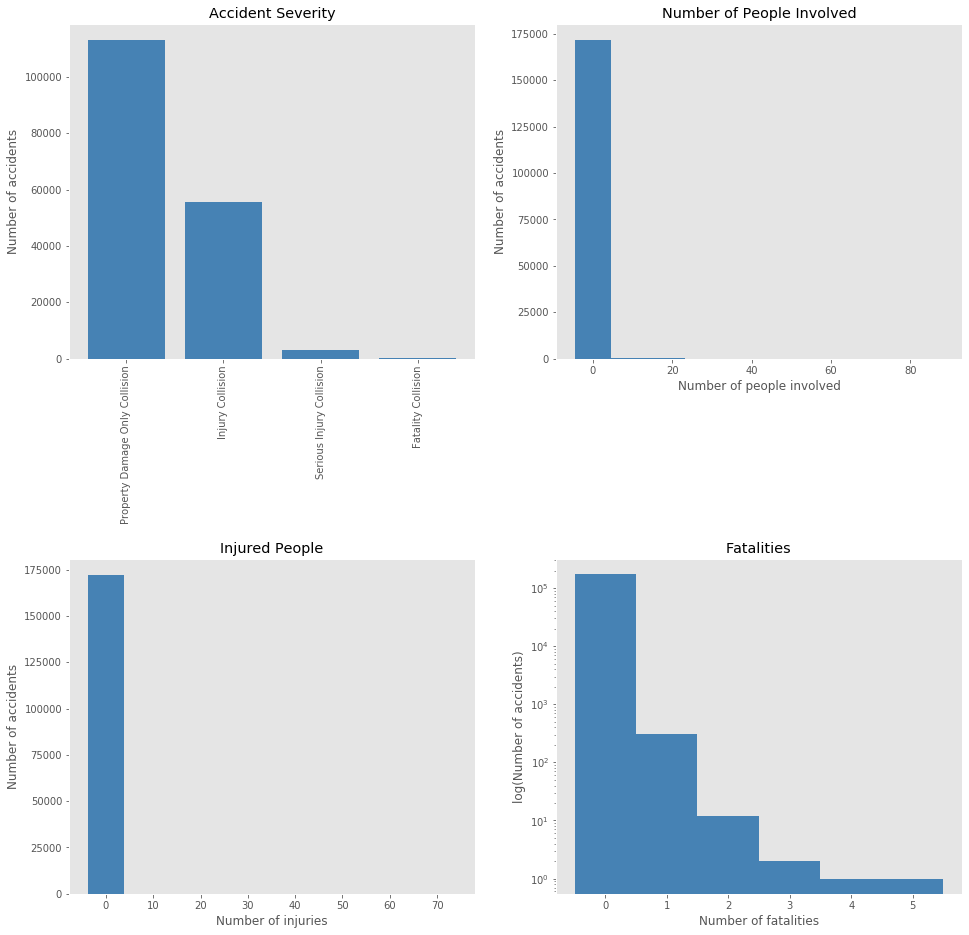

In [20]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(df_CAS["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('Accident Severity')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='steelblue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
#plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(df_CAS["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('Number of People Involved')
plt.xlabel("Number of people involved")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.hist(df_CAS["PERSONCOUNT"], align='left', color='steelblue')
#plt.yscale('log')

#3 - Number of people involved
plt.subplot(2,2,3)
freqs = Counter(df_CAS["INJURIES"])
xvals = range(len(freqs.values()))
plt.title('Injured People')
plt.xlabel("Number of injuries")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.hist(df_CAS["INJURIES"], align='left', color='steelblue')
#plt.yscale('log')

#4 - Number of fatalities per accident
plt.subplot(2,2,4)
freqs = Counter(df_CAS["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title('Fatalities')
plt.xlabel("Number of fatalities")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df_CAS["FATALITIES"], bins=[0,1,2,3,4,5,6], align='left', color='steelblue')
plt.yscale('log')

plt.subplots_adjust(hspace=0.6)

#### 3.2 Visualize parameters that affect accident severity

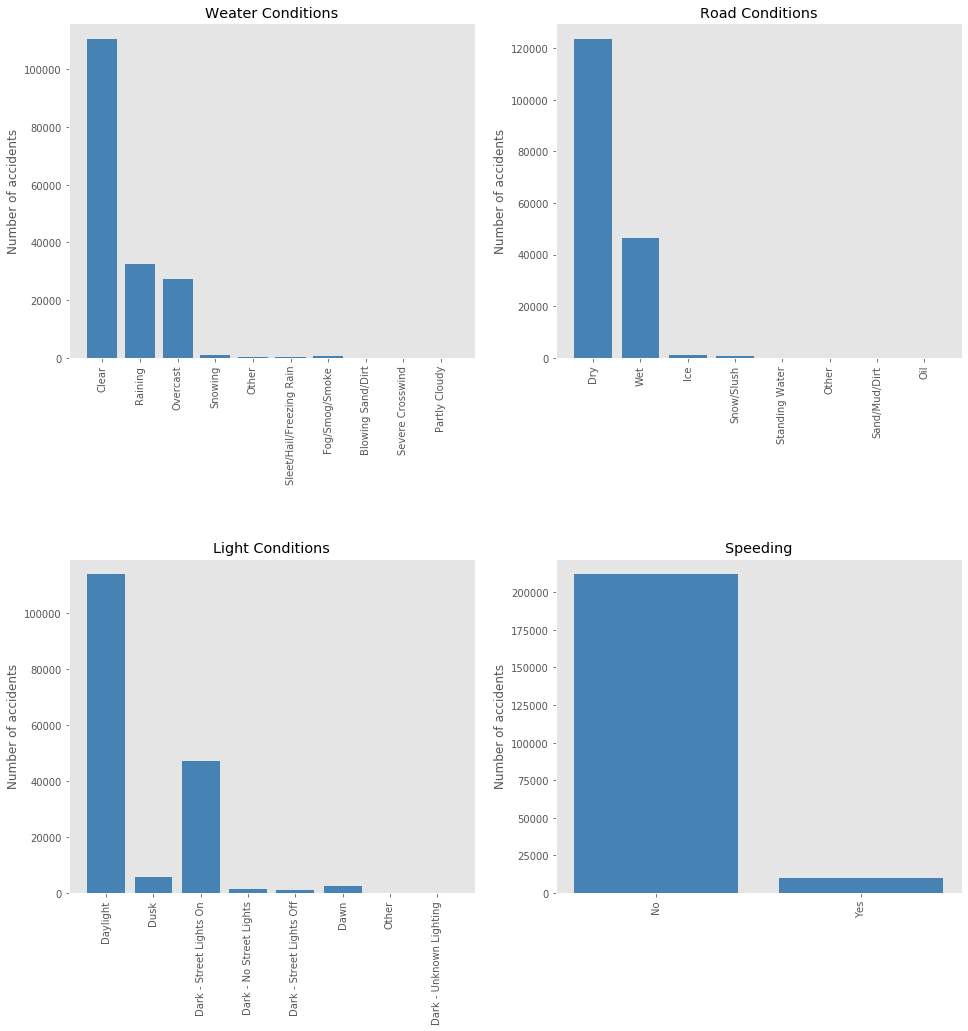

In [21]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Weather conditions
plt.subplot(2,2,1)
freqs = Counter(df_CAS["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('Weater Conditions')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='steelblue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions
plt.subplot(2,2,2)
freqs = Counter(df_CAS["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('Road Conditions')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='steelblue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#3 - Light conditions
plt.subplot(2,2,3)
freqs = Counter(df_CAS["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('Light Conditions')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='steelblue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#4 - Speeding
plt.subplot(2,2,4)
freqs = Counter(df_PLT)
xvals = range(len(freqs.values()))
plt.title('Speeding')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='steelblue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)

#### 3.3 Building Correlation Matrix

###### Build correlation matrix to discover which columns need to be included for model building

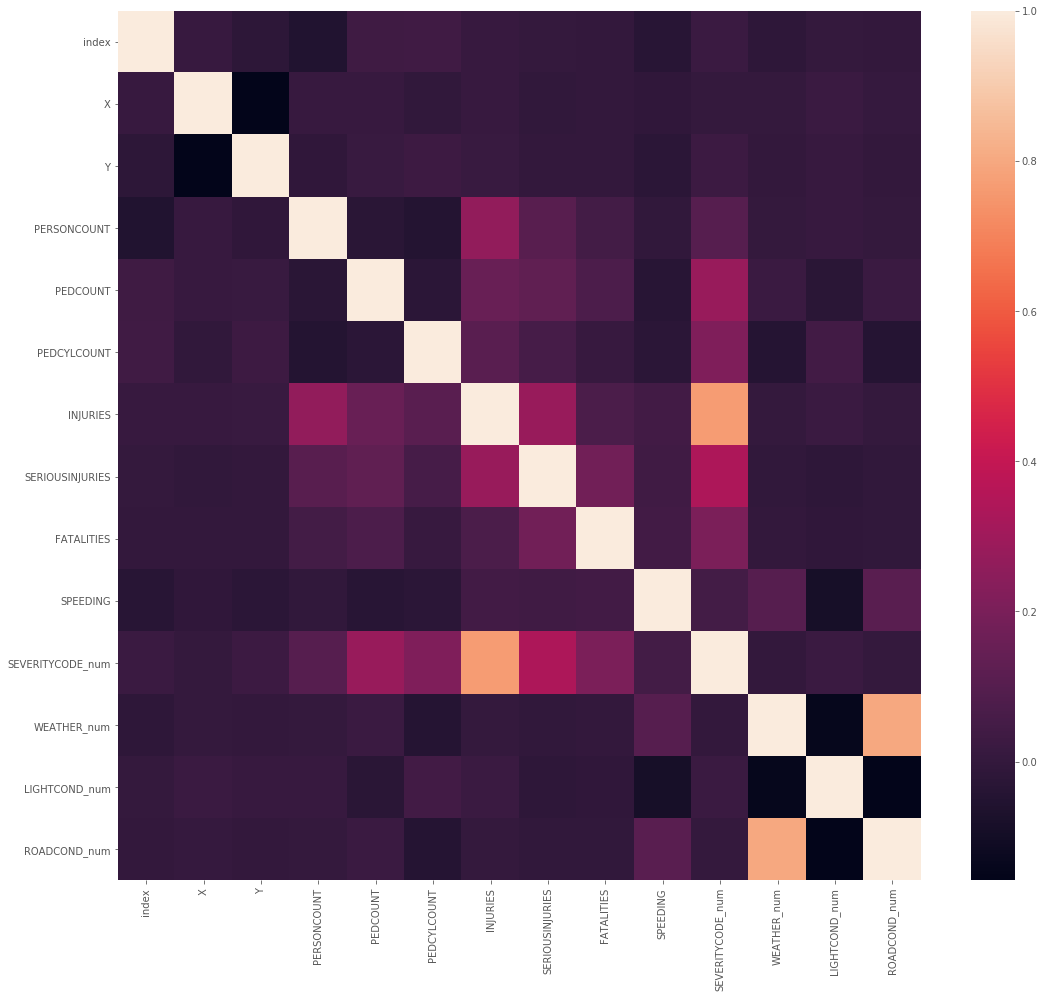

In [22]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,16)
corr = df_CAS.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### 3.4 Balancing the Data

###### Data balancing and standardization. The target variable for this study is SEVERITYCODE which represents severity of accidents contains the following values

1: Property damage only	-   113156
2: Minor injury collision	-    55584
2b: Major injury collision	-    2945
3: Fatality collision	-    328

This real-life representation of accidents outcome may bias the model, thus the model has balanced and binarized to the following 2 categories. 

0 – Minor accidents that will include property damage only
1 – Major accidents that will include all type of injuries: minor, major injuries and fatality collisions

Binarized and balanced result

0 – 58587
1 – 58587


In [23]:
#from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

df_CAS['SEVERITYCODE_num'] = df_CAS['SEVERITYCODE_num'].replace([2,3],1)
#df_CAS['SEVERITYCODE_num'] = df_CAS['SEVERITYCODE_num'].replace([3],2)

#Re-sample the dataset
shuffled_data = df_CAS.sample(frac=1, random_state=2)

#Create separate dataframes for each of the values of SEVERITYCODE
code_1 = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 0]
#code_2 = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 1]
#code_3 = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 2]
code_2 = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 1]

#Down-sample severity codes 0, 1 to match number of accidents in code 2
code_1_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 0].sample(n=len(code_2), random_state=42)
#code_2_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 1].sample(n=len(code_4), random_state=42)
#code_3_resample = shuffled_data.loc[shuffled_data["SEVERITYCODE_num"] == 2].sample(n=len(code_4), random_state=42)
code_2_resample = code_2

#Merge the dataframes
#resampled_df = pd.concat([code_1_resample, code_2_resample, code_3_resample, code_4_resample])
resampled_df = pd.concat([code_1_resample, code_2_resample])
#Now find out which of the resampled columns have no variation left in them 
#(e.g. rare weather conditions which are all "0" due to one-hot encoding and 
#re-sampling)
#badcols = resampled_df.columns[resampled_df.nunique() <= 1]

#Remove these from DF
#for badcol in badcols:
#   if badcol in resampled_df:
#        del resampled_df[badcol]
        
print(resampled_df.shape)

resampled_df["SEVERITYCODE_num"].value_counts()

(117714, 19)


1    58857
0    58857
Name: SEVERITYCODE_num, dtype: int64

##### Normalize and Binarize the Data

In [24]:
#Normalize the data
from sklearn import preprocessing
Feature = resampled_df[['WEATHER_num','LIGHTCOND_num','ROADCOND_num','SPEEDING','PERSONCOUNT','PEDCOUNT',"PEDCYLCOUNT"]]
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

#Binarise SEVERITY code
Y = resampled_df["SEVERITYCODE_num"]
resampled_df["SEVERITYCODE_num"].value_counts()

1    58857
0    58857
Name: SEVERITYCODE_num, dtype: int64

### 4. Building the Model

##### 4.1 Split Dataset to Testing and Training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (88285, 7) (88285,)
Test set: (29429, 7) (29429,)


#### 4.2 Traing and Test the Model

##### Support Vector Machine SVM

In [26]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
SVM_yhat = SVM_model.predict(X_test)

In [28]:
#Model evaluation
print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, SVM_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, SVM_yhat))
print("F1-score: %.2f" % f1_score(Y_test, SVM_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(SVM_yhat , Y_test) )
print(classification_report(Y_test, SVM_yhat))

Accuracy of SVM model:
Train set Accuracy:  0.6203545336127315
Test set Accuracy:  0.6298209249379864
Jaccard index: 0.63
F1-score: 0.60
R2-score: -1.17
              precision    recall  f1-score   support

           0       0.58      0.91      0.71     14748
           1       0.79      0.35      0.48     14681

    accuracy                           0.63     29429
   macro avg       0.69      0.63      0.60     29429
weighted avg       0.69      0.63      0.60     29429



C:\Users\Yevgeniy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


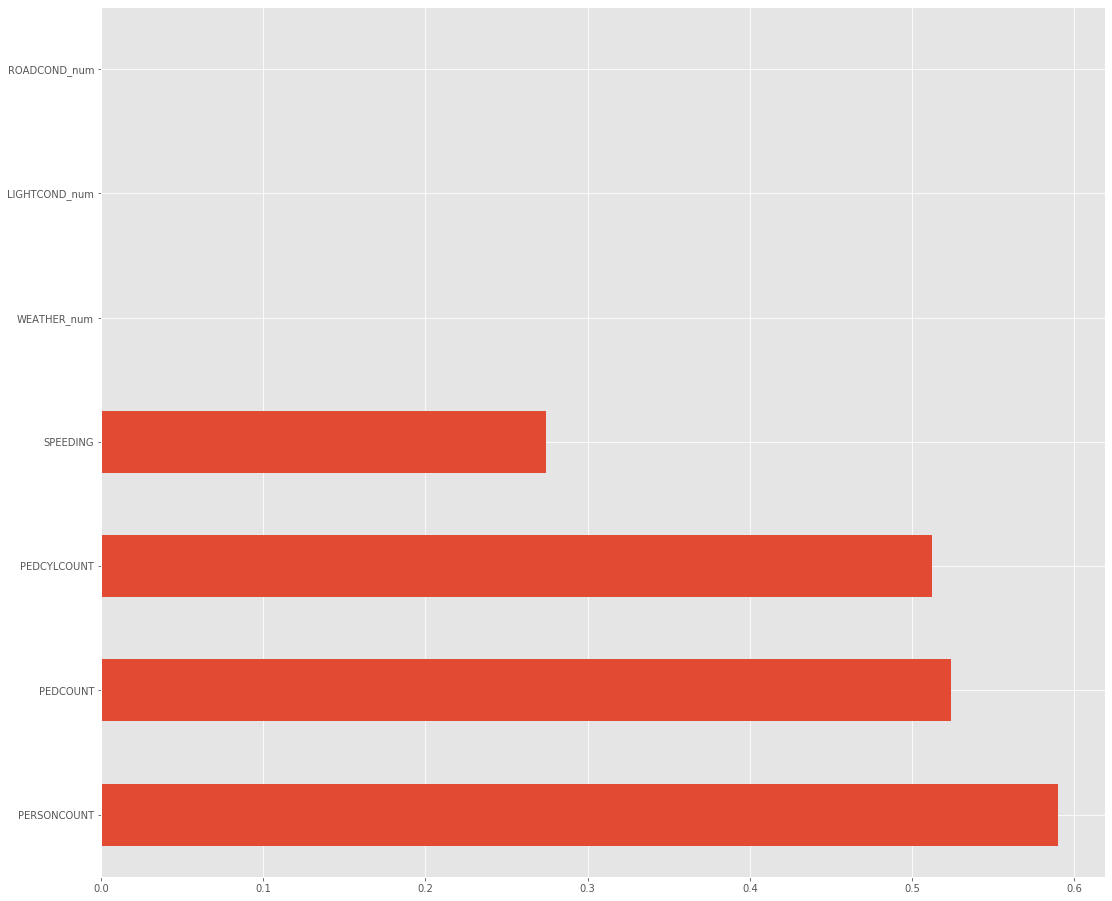

In [29]:
pd.Series(abs(SVM_model.coef_[0]), index=Feature.columns).nlargest(10).plot(kind='barh')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, inax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=inax)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0:
            ipos = i+0.25
        else:
            ipos = i-0.25
        plt.text(j, ipos, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

#!conda install -c conda-forge pydotplus -y
plt.rcParams["figure.figsize"] = (16,24)

Normalized confusion matrix
[[0.35 0.65]
 [0.09 0.91]]


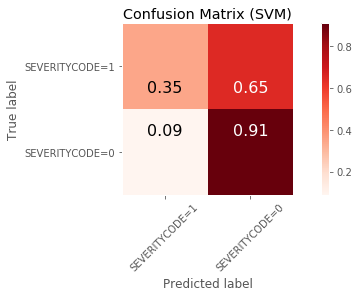

In [975]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, SVM_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (SVM)', cmap=plt.cm.Reds)

#### KNN

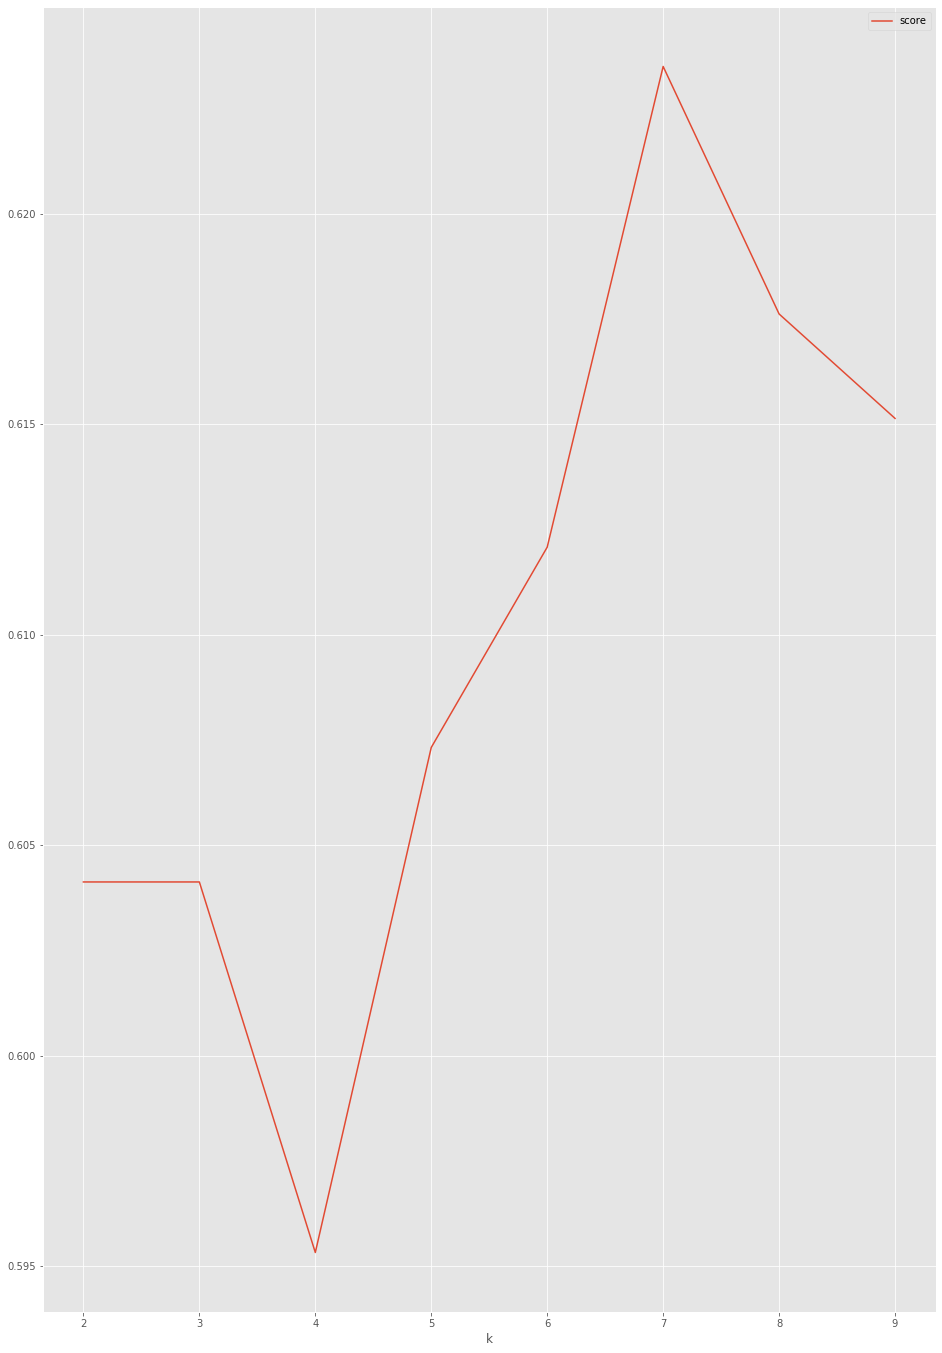

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#Splitting. 75% of data is used for training and 25% is used for testing
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=4)
evaluation = pd.DataFrame({'k':[], 'score':[]})

#Iterating to find best number of neighbors
for k in range(2,10):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    score = metrics.accuracy_score(Y_test, knn.predict(X_test))
    evaluation = evaluation.append({'k':k, 'score':score}, ignore_index=True)

evaluation.plot(kind='line', x='k', y='score',xticks = range(2,10))

In [34]:
#Re-run the model with the best K  
kNN_model = KNeighborsClassifier(n_neighbors=7).fit(X_train,Y_train)
kNN_yhat = kNN_model.predict(X_test)  
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [35]:
#Model evaluation
print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, kNN_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, kNN_yhat))
print("F1-score: %.2f" % f1_score(Y_test, kNN_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(kNN_yhat , Y_test) )
print(classification_report(Y_test, kNN_yhat))

Accuracy of kNN model:
Train set Accuracy:  0.6308546185648751
Test set Accuracy:  0.6235006286316219
Jaccard index: 0.62
F1-score: 0.62
R2-score: -0.55
              precision    recall  f1-score   support

           0       0.61      0.70      0.65     14702
           1       0.65      0.54      0.59     14727

    accuracy                           0.62     29429
   macro avg       0.63      0.62      0.62     29429
weighted avg       0.63      0.62      0.62     29429



C:\Users\Yevgeniy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Normalized confusion matrix
[[0.54 0.46]
 [0.3  0.7 ]]


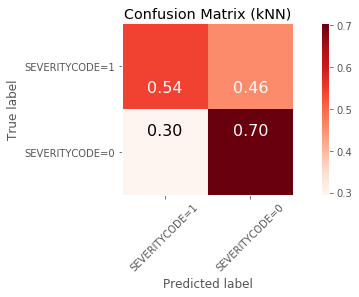

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, kNN_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plt.rcParams["figure.figsize"] = (8,4)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (kNN)', cmap=plt.cm.Reds)

### Decision Tree

,depth,score
0,2.0,0.595433
1,3.0,0.643413
2,4.0,0.642733
3,5.0,0.644059
4,6.0,0.646199
5,7.0,0.645214
6,8.0,0.645078
7,9.0,0.644772
8,10.0,0.644806
9,11.0,0.643787


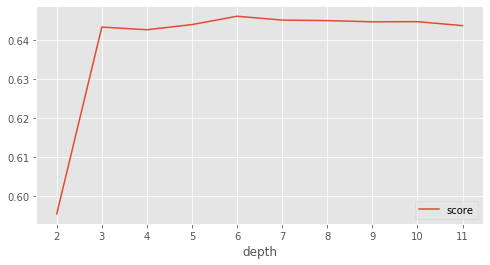

In [37]:
from sklearn.tree import DecisionTreeClassifier

#Splitting. 85% of data is used for training and 25% is used for testing
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=4)
evaluation = pd.DataFrame({'depth':[], 'score':[]})

for d in range (2,12):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtc.fit(X_train,Y_train)    
    score = metrics.accuracy_score(Y_test, dtc.predict(X_test))
    evaluation = evaluation.append({'depth':d, 'score':score}, ignore_index=True)
    
evaluation.plot(kind='line', x='depth', y='score',xticks = range(2,12))
evaluation

In [38]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,Y_train)
#Prediction
DT_yhat = DT_model.predict(X_test)

In [39]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

Accuracy of Decision Tree model:
Train set Accuracy:  0.646916237186385
Test set Accuracy:  0.6461993271942642
Jaccard index: 0.65
F1-score: 0.64
R2-score: -0.45
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     14702
           1       0.67      0.57      0.62     14727

    accuracy                           0.65     29429
   macro avg       0.65      0.65      0.64     29429
weighted avg       0.65      0.65      0.64     29429



C:\Users\Yevgeniy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Normalized confusion matrix
[[0.57 0.43]
 [0.28 0.72]]


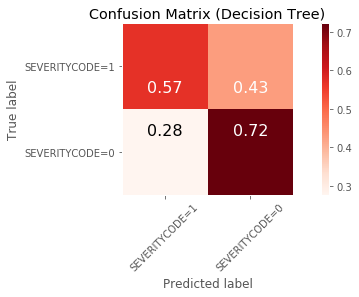

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, DT_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Decision Tree)', cmap=plt.cm.Reds)

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,Y_train)

In [42]:
LR_yhat = LR_model.predict(X_test)

In [43]:
#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, LR_yhat))
print("F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

Accuracy of Logistic Regression model:
Train set Accuracy:  0.6339695304978196
Test set Accuracy:  0.6349858982636175
Jaccard index: 0.63
F1-score: 0.62
R2-score: -0.83
              precision    recall  f1-score   support

           0       0.59      0.86      0.70     14702
           1       0.75      0.41      0.53     14727

    accuracy                           0.63     29429
   macro avg       0.67      0.64      0.62     29429
weighted avg       0.67      0.63      0.62     29429



C:\Users\Yevgeniy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Normalized confusion matrix
[[0.41 0.59]
 [0.14 0.86]]


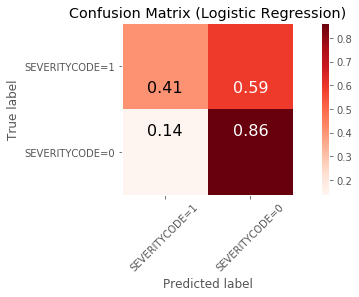

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (8,4)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (Logistic Regression)', cmap=plt.cm.Reds)